## Understanding and exploring different returns

(a) Construct a list of features using the information provided above. You can choose which variables to include; you can also combine different variables. Briefly explain why you decide to include these features. Caution: You should not directly use non-stationary variables as predictors (why?). Find a way to make these variables stationary when applicable.

I think there are some additional features that I may want to include to describe some more complex mathematical relationship between variables. 

Further for those features that are non-stationary maybe I can look towards different methods of making a non-stationary variable stationary including differencing, or z-scoring and potentially other methods. 

These additional features include higher level powers for the terms included in the data, maybe some square terms. What variables would related in a polynomial fashion to returns?  


Beyond just high power terms, I would like to utilize other feature transformations including logarithm of the variable too for features that may have some kind of diminishing return. 

Some other terms to include would also be interaction terms together, where we may believe there would be high interactions in the data. 


In addition it is not good to use non-stationary variables as a predictor because you will see a spurious relationship between a non-stationary variable vs a predictor (you will simply be following a trend), imagine predicting CO2 emissions on SP500 level you may see a trivially relevant and high R^2. 

## Imports 

In [229]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix



# Cleaning up the data

In [230]:
df = pd.read_csv('Data_Pred_Return.csv')
df = df.drop(columns='Unnamed: 0')
df

,dates,cusip,Price,MV,M2B,S2A,SD2A,LD2A,PE,Sales,RET
0,1/31/89,268648,5.000,118010.00,0.755203,0.201227,0.108985,0.131152,-10.9375,24.110,-0.069767
1,2/28/89,268648,4.250,100308.50,0.755203,0.201227,0.108985,0.131152,-10.9375,24.110,-0.150000
2,3/31/89,268648,3.500,82607.00,0.755203,0.201227,0.108985,0.131152,-10.9375,24.110,-0.176471
3,4/28/89,268648,3.500,82607.00,1.140085,0.280158,0.106694,0.124799,512.5000,34.616,0.000000
4,5/31/89,268648,4.125,97358.25,1.140085,0.280158,0.106694,0.124799,512.5000,34.616,0.178571
...,...,...,...,...,...,...,...,...,...,...,...
49027,8/31/16,74733V,19.100,4576474.60,1.287053,0.082654,0.000929,0.436464,-93.0000,382.400,0.049451
49028,9/30/16,74733V,19.530,4679505.18,1.287053,0.082654,0.000929,0.436464,-93.0000,382.400,0.022513
49029,10/31/16,74733V,16.070,3849697.06,1.259325,0.078494,0.002416,0.396870,-32.8750,399.700,-0.177163
49030,11/30/16,74733V,19.660,4709710.28,1.259325,0.078494,0.002416,0.396870,-32.8750,399.700,0.223398


In [231]:
df['POS_RET'] = df['RET']>0
df['POS_RET'] = df['POS_RET'].astype(int)
df['dates'] = pd.to_datetime(df['dates'])

df = df.drop(columns='RET')
df

/var/folders/cf/zk37hd_50bv_nlrdlxrb4q3r0000gn/T/ipykernel_34841/1537455856.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dates'] = pd.to_datetime(df['dates'])


,dates,cusip,Price,MV,M2B,S2A,SD2A,LD2A,PE,Sales,POS_RET
0,1989-01-31,268648,5.000,118010.00,0.755203,0.201227,0.108985,0.131152,-10.9375,24.110,0
1,1989-02-28,268648,4.250,100308.50,0.755203,0.201227,0.108985,0.131152,-10.9375,24.110,0
2,1989-03-31,268648,3.500,82607.00,0.755203,0.201227,0.108985,0.131152,-10.9375,24.110,0
3,1989-04-28,268648,3.500,82607.00,1.140085,0.280158,0.106694,0.124799,512.5000,34.616,0
4,1989-05-31,268648,4.125,97358.25,1.140085,0.280158,0.106694,0.124799,512.5000,34.616,1
...,...,...,...,...,...,...,...,...,...,...,...
49027,2016-08-31,74733V,19.100,4576474.60,1.287053,0.082654,0.000929,0.436464,-93.0000,382.400,1
49028,2016-09-30,74733V,19.530,4679505.18,1.287053,0.082654,0.000929,0.436464,-93.0000,382.400,1
49029,2016-10-31,74733V,16.070,3849697.06,1.259325,0.078494,0.002416,0.396870,-32.8750,399.700,0
49030,2016-11-30,74733V,19.660,4709710.28,1.259325,0.078494,0.002416,0.396870,-32.8750,399.700,1


In [232]:
df = df.set_index(['cusip', 'dates'])
df

Price          MV       M2B       S2A      SD2A      LD2A  \
cusip  dates                                                                    
268648 1989-01-31   5.000   118010.00  0.755203  0.201227  0.108985  0.131152   
       1989-02-28   4.250   100308.50  0.755203  0.201227  0.108985  0.131152   
       1989-03-31   3.500    82607.00  0.755203  0.201227  0.108985  0.131152   
       1989-04-28   3.500    82607.00  1.140085  0.280158  0.106694  0.124799   
       1989-05-31   4.125    97358.25  1.140085  0.280158  0.106694  0.124799   
...                   ...         ...       ...       ...       ...       ...   
74733V 2016-08-31  19.100  4576474.60  1.287053  0.082654  0.000929  0.436464   
       2016-09-30  19.530  4679505.18  1.287053  0.082654  0.000929  0.436464   
       2016-10-31  16.070  3849697.06  1.259325  0.078494  0.002416  0.396870   
       2016-11-30  19.660  4709710.28  1.259325  0.078494  0.002416  0.396870   
       2016-12-30  18.410  4410262.78  1.259325  0.078494  0.002416  0.396870   

                         PE    Sales  POS_RET  
cusip  dates                                   
268648 1989-01-31  -10.9375   24.110        0  
       1989-02-28  -10.9375   24.110        0  
       1989-03-31  -10.9375   24.110        0  
       1989-04-28  512.5000   34.616        0  
       1989-05-31  512.5000   34.616        1  
...                     ...      ...      ...  
74733V 2016-08-31  -93.0000  382.400        1  
       2016-09-30  -93.0000  382.400        1  
       2016-10-31  -32.8750  399.700        0  
       2016-11-30  -32.8750  399.700        1  
       2016-12-30  -32.8750  399.700        0  

[49032 rows x 9 columns]

In [233]:
df.isna().sum()

Price         0
MV          243
M2B         445
S2A        6236
SD2A       6210
LD2A       6210
PE          320
Sales        96
POS_RET       0
dtype: int64

In [234]:
np.isinf(df).sum()

Price        0
MV           0
M2B          0
S2A          1
SD2A         0
LD2A         0
PE         210
Sales        0
POS_RET      0
dtype: int64

In [235]:
df.replace([np.inf,-np.inf], np.nan, inplace=True)

In [236]:
df = df.bfill()
df

Price          MV       M2B       S2A      SD2A      LD2A  \
cusip  dates                                                                    
268648 1989-01-31   5.000   118010.00  0.755203  0.201227  0.108985  0.131152   
       1989-02-28   4.250   100308.50  0.755203  0.201227  0.108985  0.131152   
       1989-03-31   3.500    82607.00  0.755203  0.201227  0.108985  0.131152   
       1989-04-28   3.500    82607.00  1.140085  0.280158  0.106694  0.124799   
       1989-05-31   4.125    97358.25  1.140085  0.280158  0.106694  0.124799   
...                   ...         ...       ...       ...       ...       ...   
74733V 2016-08-31  19.100  4576474.60  1.287053  0.082654  0.000929  0.436464   
       2016-09-30  19.530  4679505.18  1.287053  0.082654  0.000929  0.436464   
       2016-10-31  16.070  3849697.06  1.259325  0.078494  0.002416  0.396870   
       2016-11-30  19.660  4709710.28  1.259325  0.078494  0.002416  0.396870   
       2016-12-30  18.410  4410262.78  1.259325  0.078494  0.002416  0.396870   

                         PE    Sales  POS_RET  
cusip  dates                                   
268648 1989-01-31  -10.9375   24.110        0  
       1989-02-28  -10.9375   24.110        0  
       1989-03-31  -10.9375   24.110        0  
       1989-04-28  512.5000   34.616        0  
       1989-05-31  512.5000   34.616        1  
...                     ...      ...      ...  
74733V 2016-08-31  -93.0000  382.400        1  
       2016-09-30  -93.0000  382.400        1  
       2016-10-31  -32.8750  399.700        0  
       2016-11-30  -32.8750  399.700        1  
       2016-12-30  -32.8750  399.700        0  

[49032 rows x 9 columns]

In [237]:
df.isna().sum()

Price      0
MV         0
M2B        0
S2A        0
SD2A       0
LD2A       0
PE         0
Sales      0
POS_RET    0
dtype: int64

In [238]:
np.isinf(df).sum()

Price      0
MV         0
M2B        0
S2A        0
SD2A       0
LD2A       0
PE         0
Sales      0
POS_RET    0
dtype: int64

In [239]:
df.describe()

,Price,MV,M2B,S2A,SD2A,LD2A,PE,Sales,POS_RET
count,49032.000000,4.903200e+04,49032.000000,49032.000000,49032.000000,49032.000000,49032.000000,49032.000000,49032.000000
mean,46.541690,7.894969e+06,3.446762,0.310974,0.055822,0.132499,92.844663,1442.242221,0.559410
std,65.585127,1.721146e+07,6.604129,25.124775,0.324430,23.063372,442.033468,3571.954507,0.496463
min,-38.062500,-5.117503e+05,0.000004,-3140.647818,-13.000000,-2857.142857,-17225.000000,0.908000,0.000000
25%,21.960000,1.259198e+06,1.587014,0.135745,0.000048,0.106548,43.438356,148.663750,0.000000
50%,33.875000,3.168337e+06,2.481847,0.299170,0.012344,0.320712,72.596154,466.539000,1.000000
75%,53.150000,6.945069e+06,3.937302,0.603845,0.054672,0.493402,112.396394,1234.000000,1.000000
max,1780.339970,5.058048e+08,1006.642000,213.752613,20.066667,342.465753,17600.000000,50130.000000,1.000000


## Getting rid of outliers in the data for things that are too big 

In [240]:
def winsorize_columns(df, columns, lower_quantile=0.02, upper_quantile=0.995):
    """
    Winsorizes specified columns in a DataFrame by clipping values 
    outside the quantile range.
    """
    df_win = df.copy()
    
    for col in columns:
        lower = df[col].quantile(lower_quantile)
        upper = df[col].quantile(upper_quantile)
        # Clip values to the boundaries
        df_win[col] = df[col].clip(lower=lower, upper=upper)
        
    return df_win

# Usage
cols_to_fix = ['MV','M2B','S2A','SD2A','LD2A','PE','Price'] # List your "bad" columns
df = winsorize_columns(df, cols_to_fix)

In [241]:
df.describe()

,Price,MV,M2B,S2A,SD2A,LD2A,PE,Sales,POS_RET
count,49032.000000,4.903200e+04,49032.000000,49032.000000,49032.000000,49032.000000,49032.000000,49032.000000,49032.000000
mean,45.018477,7.625755e+06,3.321304,0.529120,0.055571,0.330136,96.599740,1442.242221,0.559410
std,45.298774,1.412535e+07,2.930565,0.795269,0.124922,0.263098,195.999321,3571.954507,0.496463
min,5.746200,9.424995e+04,0.685786,0.013656,0.000000,0.000000,-338.000000,0.908000,0.000000
25%,21.960000,1.259198e+06,1.587014,0.135745,0.000048,0.106548,43.438356,148.663750,0.000000
50%,33.875000,3.168337e+06,2.481847,0.299170,0.012344,0.320712,72.596154,466.539000,1.000000
75%,53.150000,6.945069e+06,3.937302,0.603845,0.054672,0.493402,112.396394,1234.000000,1.000000
max,429.907560,1.106922e+08,22.066328,6.903285,0.954610,1.505072,1665.013334,50130.000000,1.000000


# Diagnosing stationarity by looking at the segmented cross section and running a few tests on a specific stock for visualization and familiaization purposes

In [242]:
#how to get a stock based on a specific key 
sample_stock = df.loc['268648']

In [243]:
sample_stock.isna().sum()

Price      0
MV         0
M2B        0
S2A        0
SD2A       0
LD2A       0
PE         0
Sales      0
POS_RET    0
dtype: int64

In [244]:
x = np.isinf(sample_stock).sum()
print(x)

Price      0
MV         0
M2B        0
S2A        0
SD2A       0
LD2A       0
PE         0
Sales      0
POS_RET    0
dtype: int64


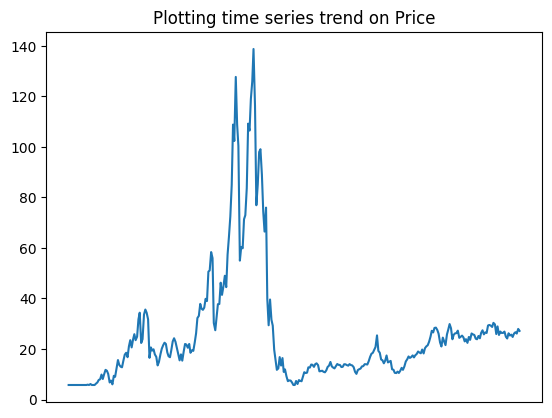

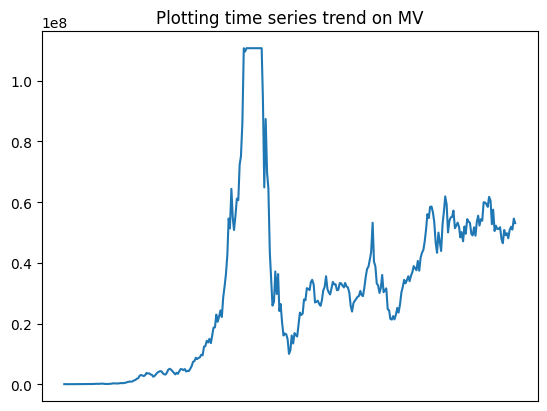

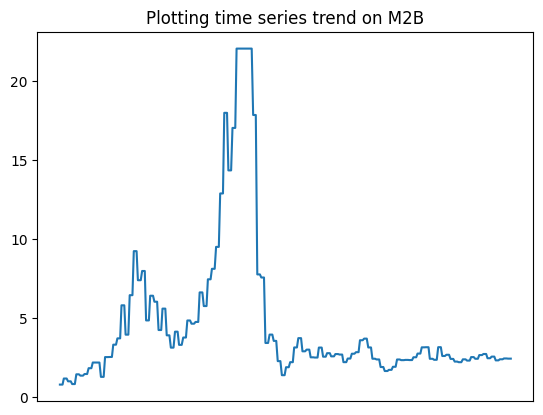

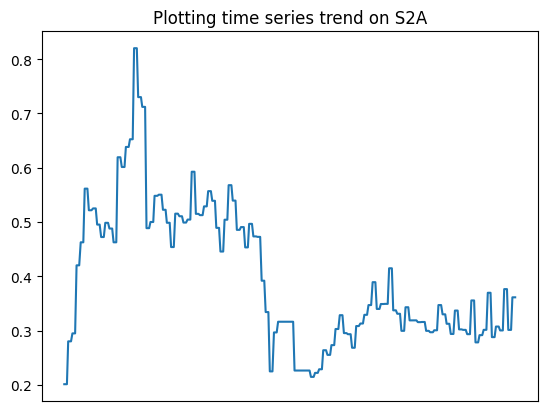

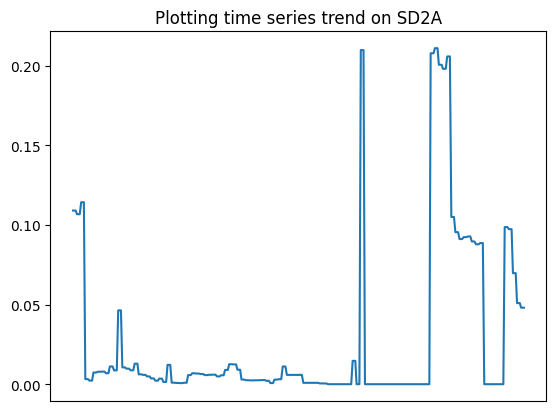

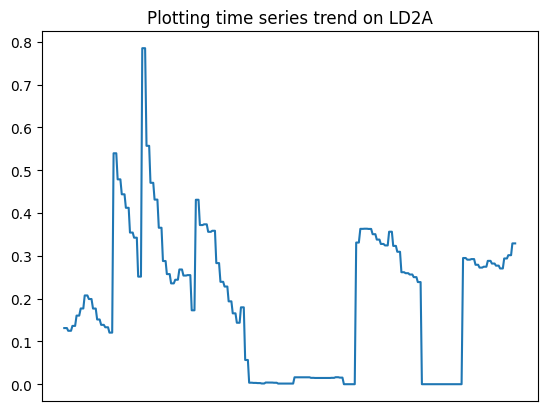

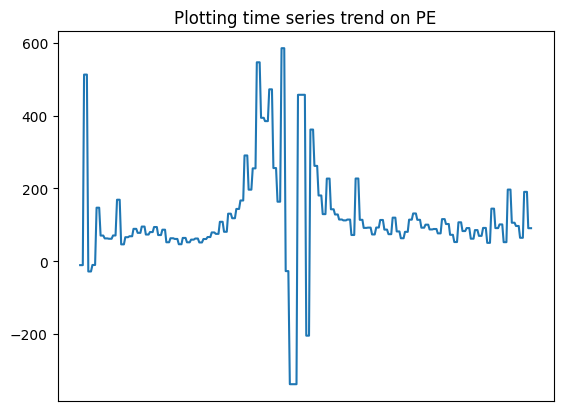

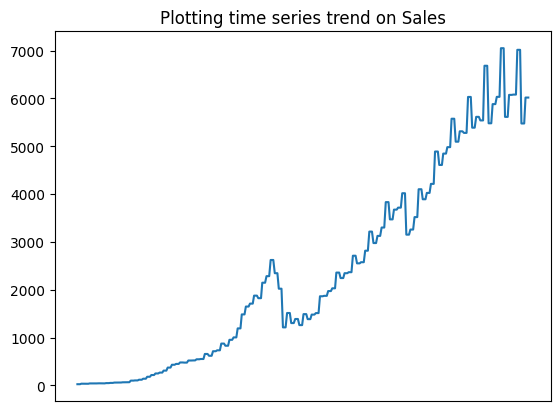

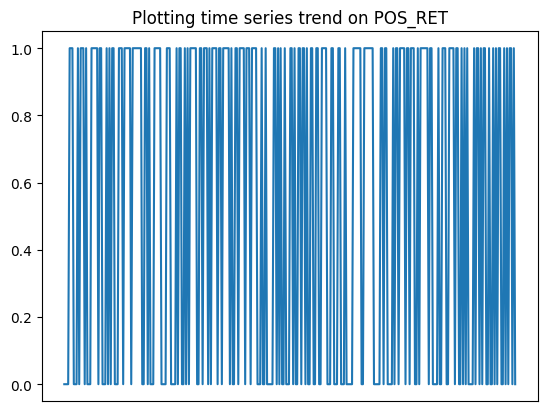

In [245]:
for col in sample_stock.columns:
    plt.title(f'Plotting time series trend on {col}')
    plt.plot(sample_stock[col])
    length = sample_stock[col].size
    plt.xticks([])
    plt.show()

# Checking non-stationary of the data


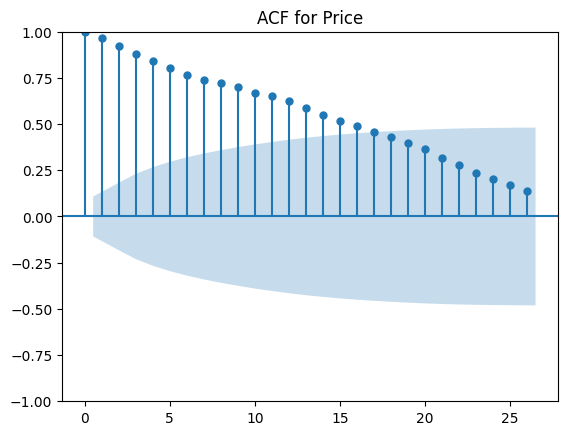

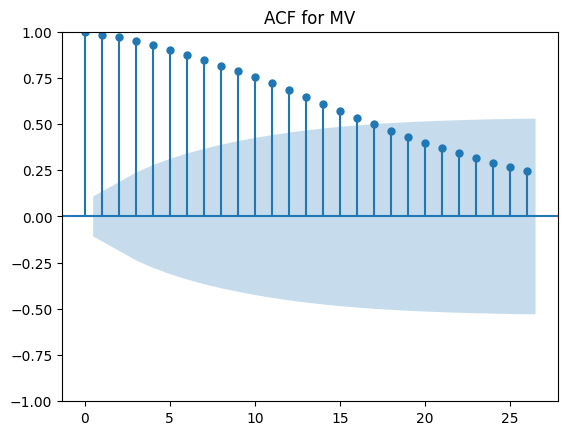

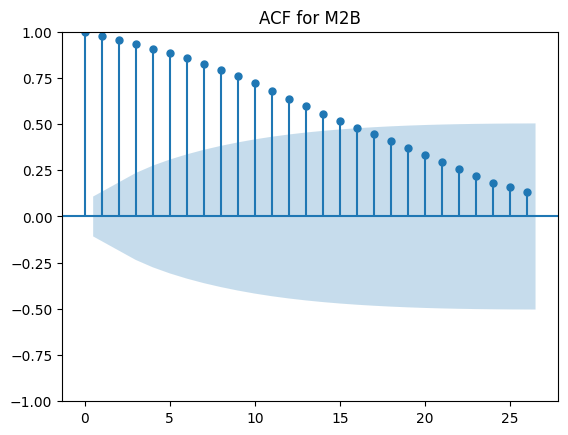

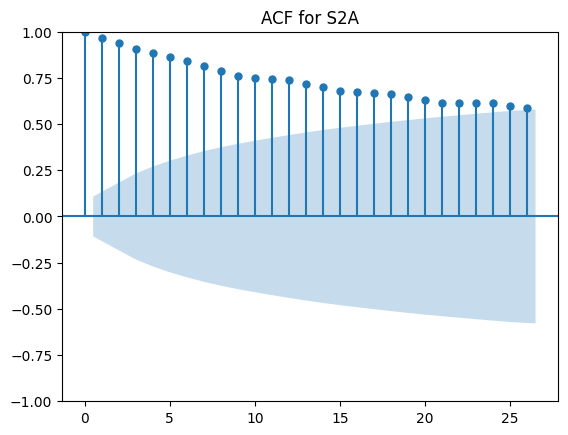

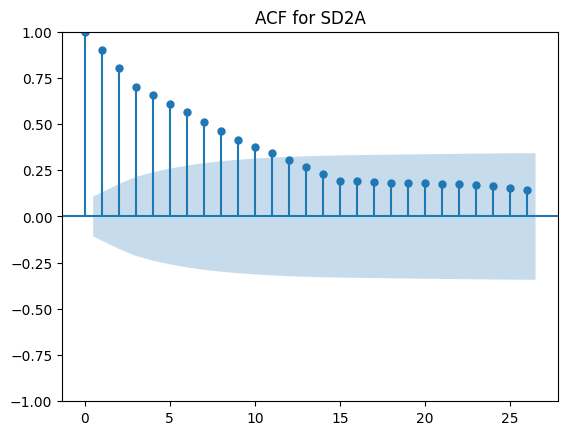

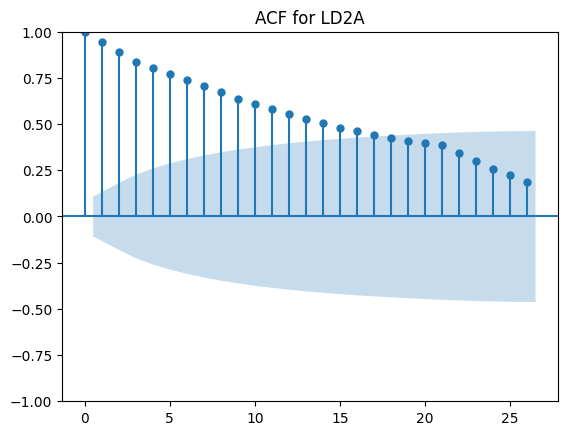

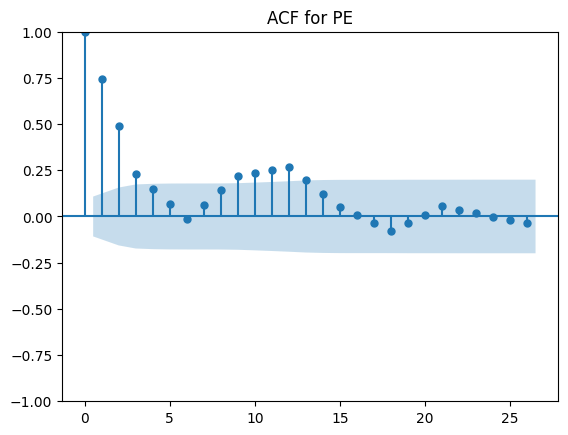

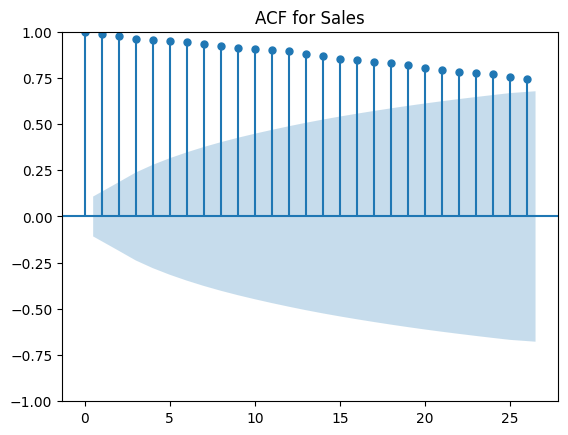

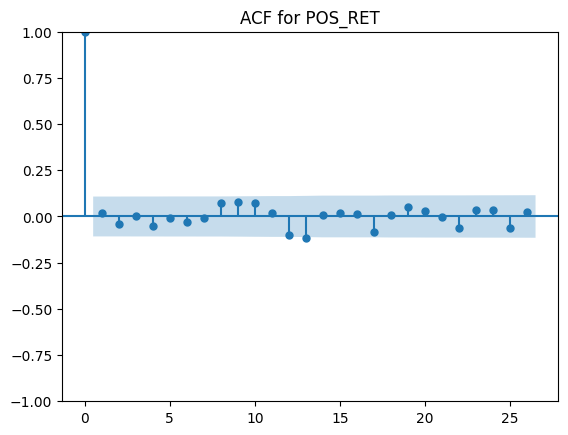

In [246]:
for col in sample_stock.columns:
    plot_acf(sample_stock[col], title=f"ACF for {col}")

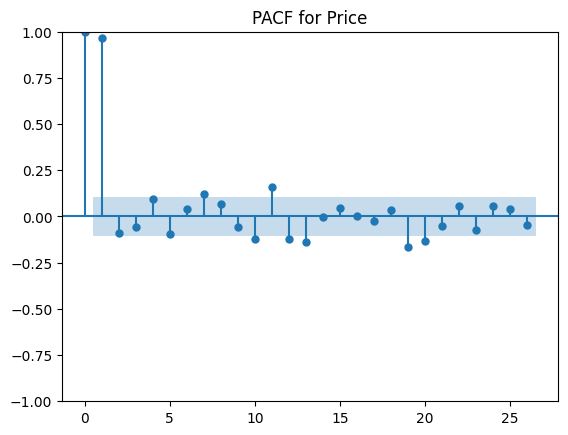

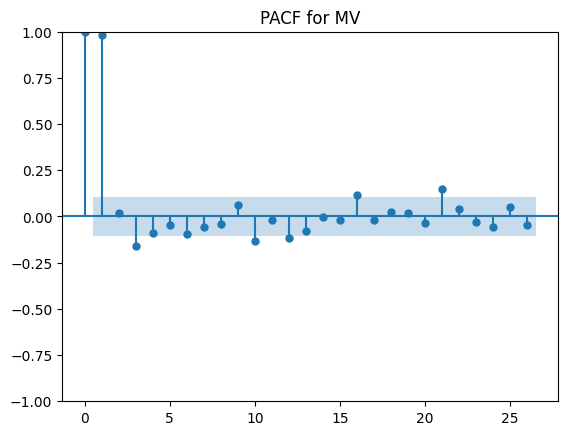

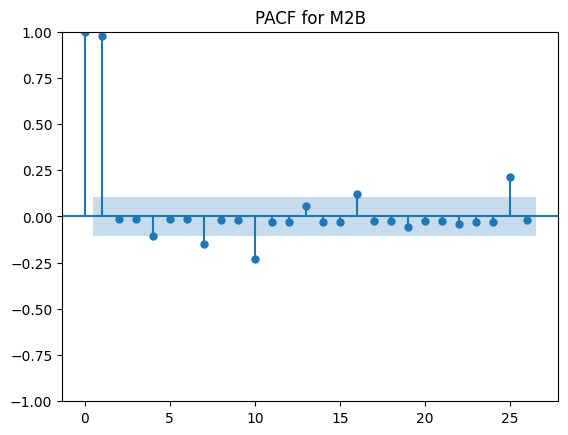

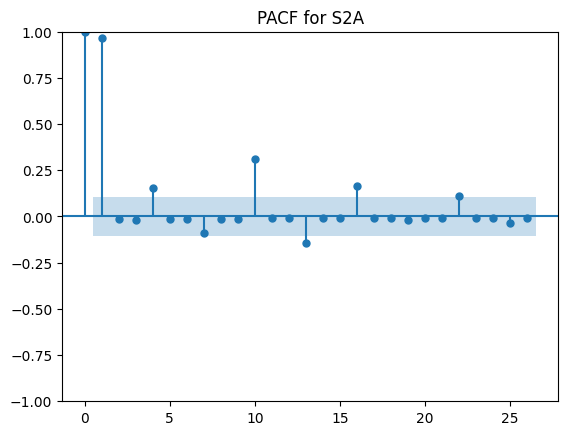

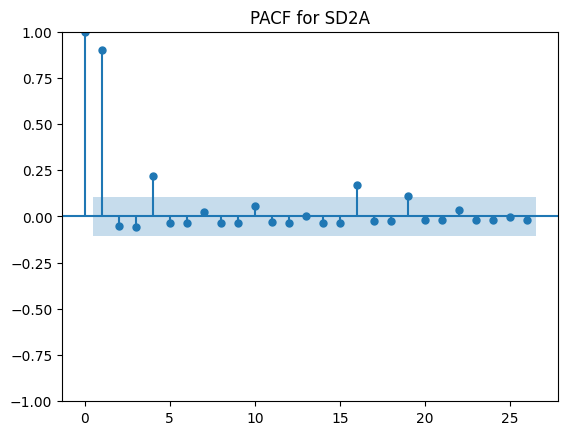

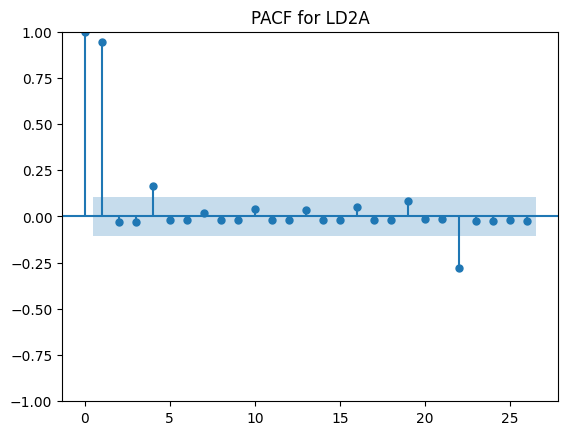

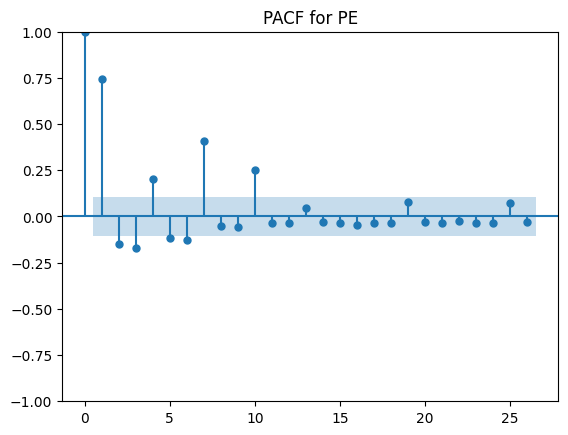

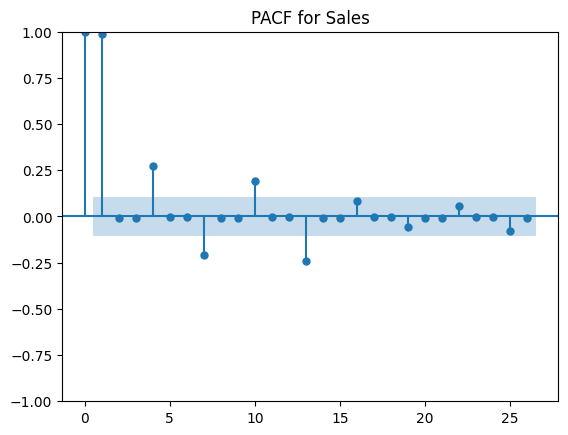

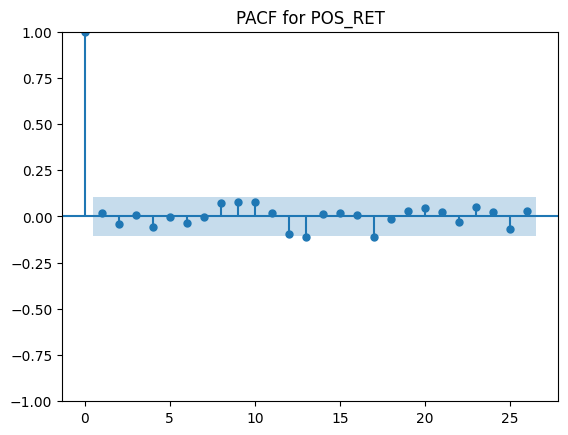

In [247]:
for col in sample_stock.columns:
    plot_pacf(sample_stock[col], title=f"PACF for {col}")

In [248]:
cusip_list = df.index.get_level_values('cusip')
cusip_list = list(dict.fromkeys(list(cusip_list)))
cusip_list

['268648',
 '44267D',
 '50212V',
 '339041',
 'G6518L',
 '49456B',
 '446413',
 '56585A',
 '98954M',
 '85571Q',
 '98419M',
 '98212B',
 'G60754',
 '896945',
 '737446',
 '92210H',
 '718546',
 '76131V',
 '30303M',
 '42225P',
 'G7S00T',
 '966244',
 '25278X',
 '69318G',
 '23283R',
 'G66721',
 '98978V',
 '72348P',
 '12646R',
 '929089',
 '65249B',
 '222070',
 'G5785G',
 '84860W',
 '85207U',
 '626755',
 'N33462',
 '85208M',
 '198287',
 '68268W',
 '922475',
 '20337X',
 '30224P',
 '80283M',
 '69007J',
 '63938C',
 '701877',
 '66705Y',
 '58605Q',
 '87165B',
 '174610',
 '49338L',
 '98919V',
 '530307',
 '91843L',
 '69924R',
 '862121',
 '928377',
 '380237',
 'G4863A',
 '500754',
 '89400J',
 '70450Y',
 '55825T',
 '96145D',
 '35906A',
 '748356',
 '872375',
 '444859',
 '720186',
 '817565',
 '589400',
 '89417E',
 '78442P',
 '942622',
 '790849',
 '855030',
 '871503',
 '192422',
 '26875P',
 '285512',
 '17275R',
 '436440',
 '902252',
 '983919',
 '896239',
 '22282E',
 '75886F',
 '912909',
 '69840W',
 '989207',

In [249]:
df

Price           MV       M2B       S2A      SD2A  \
cusip  dates                                                            
268648 1989-01-31   5.7462   118010.000  0.755203  0.201227  0.108985   
       1989-02-28   5.7462   100308.500  0.755203  0.201227  0.108985   
       1989-03-31   5.7462    94249.945  0.755203  0.201227  0.108985   
       1989-04-28   5.7462    94249.945  1.140085  0.280158  0.106694   
       1989-05-31   5.7462    97358.250  1.140085  0.280158  0.106694   
...                    ...          ...       ...       ...       ...   
74733V 2016-08-31  19.1000  4576474.600  1.287053  0.082654  0.000929   
       2016-09-30  19.5300  4679505.180  1.287053  0.082654  0.000929   
       2016-10-31  16.0700  3849697.060  1.259325  0.078494  0.002416   
       2016-11-30  19.6600  4709710.280  1.259325  0.078494  0.002416   
       2016-12-30  18.4100  4410262.780  1.259325  0.078494  0.002416   

                       LD2A        PE    Sales  POS_RET  
cusip  dates                                             
268648 1989-01-31  0.131152  -10.9375   24.110        0  
       1989-02-28  0.131152  -10.9375   24.110        0  
       1989-03-31  0.131152  -10.9375   24.110        0  
       1989-04-28  0.124799  512.5000   34.616        0  
       1989-05-31  0.124799  512.5000   34.616        1  
...                     ...       ...      ...      ...  
74733V 2016-08-31  0.436464  -93.0000  382.400        1  
       2016-09-30  0.436464  -93.0000  382.400        1  
       2016-10-31  0.396870  -32.8750  399.700        0  
       2016-11-30  0.396870  -32.8750  399.700        1  
       2016-12-30  0.396870  -32.8750  399.700        0  

[49032 rows x 9 columns]

In [250]:
#Augmented dickey fuller test

stationary_series = {col:0 for col in df.columns}
length = len(cusip_list)

for sid in cusip_list:
    stock_data = df.loc[sid]
    for col in stock_data.columns:
        try:
            results = adfuller(stock_data[col])
            if results[1]<0.10:
                stationary_series[col]+=1
        except:
            continue

stationary_series = {col:stationary_series[col]/length for col in df.columns}
stationary_series_list = sorted([(col, stationary_series[col]) for col in stationary_series], key=lambda x:x[1], reverse=True)


print(f"Percentage of time series that are stationary {stationary_series}")


/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Percentage of time series that are stationary {'Price': 0.1948529411764706, 'MV': 0.05514705882352941, 'M2B': 0.2536764705882353, 'S2A': 0.3639705882352941, 'SD2A': 0.4338235294117647, 'LD2A': 0.2610294117647059, 'PE': 0.6066176470588235, 'Sales': 0.04779411764705882, 'POS_RET': 0.9779411764705882}


# What changes do we want to make to the variables given the discovery of which series are stationary?

Market value, Sales, M2B, LD2A, SD2A, PE are not stationary for a substanstial amount of the data points. 

I propose we make new variables which are based on differences. For sales let's make a new variable that is difference in YoY sales from 4 quarters ago or maybe the difference in differences metric, for market value let's do a percent change or logarithm of the change over the total price. For the ratios its a little more nuanced on how we should transform them to make them stationary, perhaps we should consider the lag 1 difference but that doesn't make much sense since ratios are multilplicative, perhaps a better measure would be dividing th current value by the last value and utilizing that change. 

Let's see if we do this what changes we can determine and see. 


So is price (this should not be a regressor at all). 

In [251]:
#difference in differences 
df['D.Sales'] = df['Sales'].diff(3) - df['Sales'].shift(9).diff(3)
# df['MV'] = df.groupby('cusip')['']
# df = df.bfill()
# df
df

Price           MV       M2B       S2A      SD2A  \
cusip  dates                                                            
268648 1989-01-31   5.7462   118010.000  0.755203  0.201227  0.108985   
       1989-02-28   5.7462   100308.500  0.755203  0.201227  0.108985   
       1989-03-31   5.7462    94249.945  0.755203  0.201227  0.108985   
       1989-04-28   5.7462    94249.945  1.140085  0.280158  0.106694   
       1989-05-31   5.7462    97358.250  1.140085  0.280158  0.106694   
...                    ...          ...       ...       ...       ...   
74733V 2016-08-31  19.1000  4576474.600  1.287053  0.082654  0.000929   
       2016-09-30  19.5300  4679505.180  1.287053  0.082654  0.000929   
       2016-10-31  16.0700  3849697.060  1.259325  0.078494  0.002416   
       2016-11-30  19.6600  4709710.280  1.259325  0.078494  0.002416   
       2016-12-30  18.4100  4410262.780  1.259325  0.078494  0.002416   

                       LD2A        PE    Sales  POS_RET  D.Sales  
cusip  dates                                                      
268648 1989-01-31  0.131152  -10.9375   24.110        0      NaN  
       1989-02-28  0.131152  -10.9375   24.110        0      NaN  
       1989-03-31  0.131152  -10.9375   24.110        0      NaN  
       1989-04-28  0.124799  512.5000   34.616        0      NaN  
       1989-05-31  0.124799  512.5000   34.616        1      NaN  
...                     ...       ...      ...      ...      ...  
74733V 2016-08-31  0.436464  -93.0000  382.400        1     88.0  
       2016-09-30  0.436464  -93.0000  382.400        1     88.0  
       2016-10-31  0.396870  -32.8750  399.700        0    224.3  
       2016-11-30  0.396870  -32.8750  399.700        1    224.3  
       2016-12-30  0.396870  -32.8750  399.700        0    224.3  

[49032 rows x 10 columns]

In [252]:
df['D.MV'] = np.log(df['MV'])/df['MV'].shift(1)*100
df['D.M2B'] = np.log(df['M2B'])/df['M2B'].shift(1)
df['D.S2A'] = np.log(df['S2A'])/df['S2A'].shift(1)
df['D.SD2A'] = np.log(df['SD2A'])/df['SD2A'].shift(1)
df['D.LD2A'] = np.log(df['LD2A'])/df['LD2A'].shift(1)
df['D.PE'] = np.log(df['PE'])/df['PE'].shift(1)
df

/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Price           MV       M2B       S2A      SD2A  \
cusip  dates                                                            
268648 1989-01-31   5.7462   118010.000  0.755203  0.201227  0.108985   
       1989-02-28   5.7462   100308.500  0.755203  0.201227  0.108985   
       1989-03-31   5.7462    94249.945  0.755203  0.201227  0.108985   
       1989-04-28   5.7462    94249.945  1.140085  0.280158  0.106694   
       1989-05-31   5.7462    97358.250  1.140085  0.280158  0.106694   
...                    ...          ...       ...       ...       ...   
74733V 2016-08-31  19.1000  4576474.600  1.287053  0.082654  0.000929   
       2016-09-30  19.5300  4679505.180  1.287053  0.082654  0.000929   
       2016-10-31  16.0700  3849697.060  1.259325  0.078494  0.002416   
       2016-11-30  19.6600  4709710.280  1.259325  0.078494  0.002416   
       2016-12-30  18.4100  4410262.780  1.259325  0.078494  0.002416   

                       LD2A        PE    Sales  POS_RET  D.Sales      D.MV  \
cusip  dates                                                                 
268648 1989-01-31  0.131152  -10.9375   24.110        0      NaN       NaN   
       1989-02-28  0.131152  -10.9375   24.110        0      NaN  0.009758   
       1989-03-31  0.131152  -10.9375   24.110        0      NaN  0.011418   
       1989-04-28  0.124799  512.5000   34.616        0      NaN  0.012152   
       1989-05-31  0.124799  512.5000   34.616        1      NaN  0.012187   
...                     ...       ...      ...      ...      ...       ...   
74733V 2016-08-31  0.436464  -93.0000  382.400        1     88.0  0.000352   
       2016-09-30  0.436464  -93.0000  382.400        1     88.0  0.000336   
       2016-10-31  0.396870  -32.8750  399.700        0    224.3  0.000324   
       2016-11-30  0.396870  -32.8750  399.700        1    224.3  0.000399   
       2016-12-30  0.396870  -32.8750  399.700        0    224.3  0.000325   

                      D.M2B      D.S2A       D.SD2A     D.LD2A      D.PE  
cusip  dates                                                              
268648 1989-01-31       NaN        NaN          NaN        NaN       NaN  
       1989-02-28 -0.371778  -7.967733   -20.338160 -15.488852       NaN  
       1989-03-31 -0.371778  -7.967733   -20.338160 -15.488852       NaN  
       1989-04-28  0.173599  -6.323224   -20.533074 -15.867469 -0.570450  
       1989-05-31  0.114994  -4.541738   -20.973919 -16.675284  0.012174  
...                     ...        ...          ...        ...       ...  
74733V 2016-08-31  0.196072 -30.162853 -7511.008077  -1.899469       NaN  
       2016-09-30  0.196072 -30.162853 -7511.008077  -1.899469       NaN  
       2016-10-31  0.179150 -30.787656 -6483.392463  -2.117351       NaN  
       2016-11-30  0.183095 -32.419381 -2494.651841  -2.328592       NaN  
       2016-12-30  0.183095 -32.419381 -2494.651841  -2.328592       NaN  

[49032 rows x 16 columns]

In [253]:
df.describe()

/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Price,MV,M2B,S2A,SD2A,LD2A,PE,Sales,POS_RET,D.Sales,D.MV,D.M2B,D.S2A,D.SD2A,D.LD2A,D.PE
count,49032.000000,4.903200e+04,49032.000000,49032.000000,49032.000000,49032.000000,49032.000000,49032.000000,49032.000000,49020.000000,49031.000000,49031.000000,49031.000000,4.903100e+04,4.903100e+04,43780.000000
mean,45.018477,7.625755e+06,3.321304,0.529120,0.055571,0.330136,96.599740,1442.242221,0.559410,0.007482,0.001275,0.263459,-22.058575,-inf,NaN,0.057134
std,45.298774,1.412535e+07,2.930565,0.795269,0.124922,0.263098,195.999321,3571.954507,0.496463,1363.383503,0.002297,0.188575,52.410800,NaN,NaN,0.081992
min,5.746200,9.424995e+04,0.685786,0.013656,0.000000,0.000000,-338.000000,0.908000,0.000000,-53145.156000,0.000010,-0.550011,-314.406025,-inf,-inf,-5.423717
25%,21.960000,1.259198e+06,1.587014,0.135745,0.000048,0.106548,43.438356,148.663750,0.000000,-46.723000,0.000226,0.243633,-14.540863,NaN,-2.142294e+01,0.038555
50%,33.875000,3.168337e+06,2.481847,0.299170,0.012344,0.320712,72.596154,466.539000,1.000000,0.354000,0.000472,0.325924,-4.024887,-3.706831e+02,-3.577696e+00,0.054556
75%,53.150000,6.945069e+06,3.937302,0.603845,0.054672,0.493402,112.396394,1234.000000,1.000000,45.639000,0.001116,0.360744,-0.831103,-5.466757e+01,-1.435871e+00,0.074574
max,429.907560,1.106922e+08,22.066328,6.903285,0.954610,1.505072,1665.013334,50130.000000,1.000000,50094.410000,0.014000,3.403396,141.474810,-4.866105e-02,inf,1.929937


In [254]:
def winsorize_columns(df, columns, lower_quantile=0.02, upper_quantile=0.995):
    """
    Winsorizes specified columns in a DataFrame by clipping values 
    outside the quantile range.
    """
    df_win = df.copy()
    
    for col in columns:
        lower = df[col].quantile(lower_quantile)
        upper = df[col].quantile(upper_quantile)
        # Clip values to the boundaries
        df_win[col] = df[col].clip(lower=lower, upper=upper)
        
    return df_win

# Usage
cols_to_fix = ['MV','M2B','S2A','SD2A','LD2A','PE','Price'] # List your "bad" columns
df_clean = winsorize_columns(df, cols_to_fix)

In [255]:
df = df.ffill()

In [256]:
df.replace([np.inf,-np.inf], np.nan, inplace=True)

In [257]:
df = df.dropna(how='any')

In [258]:
df

Price          MV       M2B       S2A      SD2A  \
cusip  dates                                                           
268648 1990-01-31   5.7462   100869.50  1.407003  0.462565  0.002240   
       1990-02-28   5.7462   124603.50  1.407003  0.462565  0.002240   
       1990-03-30   5.8750   139437.25  1.407003  0.462565  0.002240   
       1990-04-30   5.7462   127570.25  1.323559  0.561428  0.007323   
       1990-05-31   6.1250   145370.75  1.323559  0.561428  0.007323   
...                    ...         ...       ...       ...       ...   
74733V 2016-08-31  19.1000  4576474.60  1.287053  0.082654  0.000929   
       2016-09-30  19.5300  4679505.18  1.287053  0.082654  0.000929   
       2016-10-31  16.0700  3849697.06  1.259325  0.078494  0.002416   
       2016-11-30  19.6600  4709710.28  1.259325  0.078494  0.002416   
       2016-12-30  18.4100  4410262.78  1.259325  0.078494  0.002416   

                       LD2A        PE    Sales  POS_RET  D.Sales      D.MV  \
cusip  dates                                                                 
268648 1990-01-31  0.176908  146.8750   40.468        1  -10.289  0.012224   
       1990-02-28  0.176908  146.8750   40.468        1  -10.289  0.011632   
       1990-03-30  0.176908  146.8750   40.468        1  -10.289  0.009506   
       1990-04-30  0.207336   70.3125   42.705        0    3.533  0.008431   
       1990-05-31  0.207336   70.3125   42.705        1    3.533  0.009318   
...                     ...       ...      ...      ...      ...       ...   
74733V 2016-08-31  0.436464  -93.0000  382.400        1   88.000  0.000352   
       2016-09-30  0.436464  -93.0000  382.400        1   88.000  0.000336   
       2016-10-31  0.396870  -32.8750  399.700        0  224.300  0.000324   
       2016-11-30  0.396870  -32.8750  399.700        1  224.300  0.000399   
       2016-12-30  0.396870  -32.8750  399.700        0  224.300  0.000325   

                      D.M2B      D.S2A       D.SD2A     D.LD2A      D.PE  
cusip  dates                                                              
268648 1990-01-31  0.432856  -1.834933 -1910.069039 -10.808736 -0.475929  
       1990-02-28  0.242688  -1.666720 -2723.278871  -9.791082  0.033972  
       1990-03-30  0.242688  -1.666720 -2723.278871  -9.791082  0.033972  
       1990-04-30  0.199235  -1.247980 -2194.639524  -8.893960  0.028956  
       1990-05-31  0.211796  -1.028222  -671.444725  -7.588729  0.060486  
...                     ...        ...          ...        ...       ...  
74733V 2016-08-31  0.196072 -30.162853 -7511.008077  -1.899469  0.044518  
       2016-09-30  0.196072 -30.162853 -7511.008077  -1.899469  0.044518  
       2016-10-31  0.179150 -30.787656 -6483.392463  -2.117351  0.044518  
       2016-11-30  0.183095 -32.419381 -2494.651841  -2.328592  0.044518  
       2016-12-30  0.183095 -32.419381 -2494.651841  -2.328592  0.044518  

[35650 rows x 16 columns]

In [259]:
#Augmented dickey fuller test
cusip_list = df.index.get_level_values('cusip')
cusip_list = list(dict.fromkeys(list(cusip_list)))


stationary_series = {col:0 for col in df.columns}

for sid in cusip_list:
    stock_data = df.loc[sid]
    for col in stock_data.columns:
        try:
            results = adfuller(stock_data[col])
            if results[1]<0.10:
                stationary_series[col]+=1
        except:
            continue

stationary_series = {col:stationary_series[col]/length for col in df.columns}
stationary_series_list = sorted([(col, stationary_series[col]) for col in stationary_series], key=lambda x:x[1], reverse=True)


print(f"Potentially stationary series {stationary_series}")
print(f"Potentially tationary list we can look into {stationary_series_list}")

/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/nikhileshbelulkar/opt/miniconda3/envs/fingers_crossed/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


Potentially stationary series {'Price': 0.14705882352941177, 'MV': 0.0661764705882353, 'M2B': 0.18382352941176472, 'S2A': 0.2867647058823529, 'SD2A': 0.34558823529411764, 'LD2A': 0.22794117647058823, 'PE': 0.5220588235294118, 'Sales': 0.07352941176470588, 'POS_RET': 0.8897058823529411, 'D.Sales': 0.7352941176470589, 'D.MV': 0.40808823529411764, 'D.M2B': 0.5220588235294118, 'D.S2A': 0.3088235294117647, 'D.SD2A': 0.48161764705882354, 'D.LD2A': 0.3860294117647059, 'D.PE': 0.6544117647058824}
Potentially tationary list we can look into [('POS_RET', 0.8897058823529411), ('D.Sales', 0.7352941176470589), ('D.PE', 0.6544117647058824), ('PE', 0.5220588235294118), ('D.M2B', 0.5220588235294118), ('D.SD2A', 0.48161764705882354), ('D.MV', 0.40808823529411764), ('D.LD2A', 0.3860294117647059), ('SD2A', 0.34558823529411764), ('D.S2A', 0.3088235294117647), ('S2A', 0.2867647058823529), ('LD2A', 0.22794117647058823), ('M2B', 0.18382352941176472), ('Price', 0.14705882352941177), ('Sales', 0.07352941176470

In [260]:
df_new = df.reorder_levels(['dates', 'cusip'])
df_new = df_new.sort_index()
df_new

Price            MV       M2B       S2A      SD2A  \
dates      cusip                                                        
1989-01-31 720186  24.750  2.506432e+05  1.372887  0.145052  0.068235   
           748356  33.250  6.376685e+05  1.313770  0.281505  0.052386   
           817565  19.000  9.145650e+05  1.785966  0.134378  0.014728   
           872375  22.625  1.283697e+06  1.545273  0.161492  0.057008   
1989-02-28 720186  25.125  2.544409e+05  1.372887  0.145052  0.068235   
...                   ...           ...       ...       ...       ...   
2016-12-30 G9319H  55.010  4.365814e+06  1.180235  0.426811  0.227960   
           G98294  37.260  1.002518e+07  0.909108  2.743467  0.039894   
           H8817H  14.740  5.738149e+06  0.685786  0.046944  0.034895   
           P31076  90.830  2.825812e+06  2.067206  0.271222  0.100459   
           V7780T  82.040  1.760431e+07  1.930106  0.103938  0.069967   

                       LD2A          PE     Sales  POS_RET    D.Sales  \
dates      cusip                                                        
1989-01-31 720186  0.416832   13.235294   160.867        1 -13507.133   
           748356  0.330172   22.108844   203.409        1  -3458.591   
           817565  0.608857   76.442308   126.625        1   -311.262   
           872375  0.441566   46.428571   248.679        0   -147.821   
1989-02-28 720186  0.416832   13.235294   160.867        1 -13507.133   
...                     ...         ...       ...      ...        ...   
2016-12-30 G9319H  0.641255  550.100000   520.880        1   -204.990   
           G98294  0.011867   32.973451  2843.315        1    466.529   
           H8817H  0.373048   23.031250   974.000        1    581.000   
           P31076  0.433653   40.190265   601.304        1      7.809   
           V7780T  0.440879   67.245902  1909.990        1   -671.336   

                       D.MV     D.M2B      D.S2A      D.SD2A      D.LD2A  \
dates      cusip                                                           
1989-01-31 720186  0.000041  0.111160  -0.474024  -29.577569   -0.762688   
           748356  0.000337  0.311170 -11.534208 -178.084225   -1.383282   
           817565  0.000275  0.181621 -45.404657  -62.740918   -0.972599   
           872375  0.000316  0.133007 -29.559245  -17.413861   -2.312045   
1989-02-28 720186  0.004966  0.230839 -13.310088  -39.346578   -2.099341   
...                     ...       ...        ...         ...         ...   
2016-12-30 G9319H  0.000355  0.140407  -1.994828   -6.486175   -0.692903   
           G98294  0.000166 -0.104819   0.367864  -80.752352 -373.633417   
           H8817H  0.000330 -0.550011 -65.157961  -96.157629   -2.643221   
           P31076  0.000537  0.351294  -4.810870  -22.875208   -1.926683   
           V7780T  0.000096  0.340694 -21.781841  -38.013913   -1.857618   

                       D.PE  
dates      cusip             
1989-01-31 720186 -0.033927  
           748356 -0.109916  
           817565 -0.012830  
           872375  0.028743  
1989-02-28 720186  0.195151  
...                     ...  
2016-12-30 G9319H  0.011471  
           G98294  0.106016  
           H8817H  0.136200  
           P31076  0.091903  
           V7780T  0.062582  

[35650 rows x 16 columns]

In [261]:
train_df = df_new.loc[:'2012-01-01']

In [262]:
train_df

Price            MV       M2B       S2A      SD2A  \
dates      cusip                                                        
1989-01-31 720186  24.750  2.506432e+05  1.372887  0.145052  0.068235   
           748356  33.250  6.376685e+05  1.313770  0.281505  0.052386   
           817565  19.000  9.145650e+05  1.785966  0.134378  0.014728   
           872375  22.625  1.283697e+06  1.545273  0.161492  0.057008   
1989-02-28 720186  25.125  2.544409e+05  1.372887  0.145052  0.068235   
...                   ...           ...       ...       ...       ...   
2011-12-30 G97822  97.300  9.076825e+06  5.574945  0.323707  0.015448   
           G98294  19.770  6.336621e+06  0.685786  0.304683  0.107461   
           H8817H  38.390  1.401753e+07  0.855299  0.085191  0.081436   
           P31076  58.670  1.956175e+06  1.853416  0.259211  0.067177   
           V7780T  24.770  5.381580e+06  0.685786  0.106685  0.038391   

                       LD2A          PE     Sales  POS_RET    D.Sales  \
dates      cusip                                                        
1989-01-31 720186  0.416832   13.235294   160.867        1 -13507.133   
           748356  0.330172   22.108844   203.409        1  -3458.591   
           817565  0.608857   76.442308   126.625        1   -311.262   
           872375  0.441566   46.428571   248.679        0   -147.821   
1989-02-28 720186  0.416832   13.235294   160.867        1 -13507.133   
...                     ...         ...       ...      ...        ...   
2011-12-30 G97822  0.560984   90.934579   838.170        0    138.827   
           G98294  0.332125  -12.203704  1732.768        0     48.182   
           H8817H  0.459182   -2.056240  2133.000        0    203.000   
           P31076  0.480063   24.860169   505.749        0     22.453   
           V7780T  0.472131  145.705882  1775.401        0   -614.090   

                       D.MV     D.M2B      D.S2A      D.SD2A    D.LD2A  \
dates      cusip                                                         
1989-01-31 720186  0.000041  0.111160  -0.474024  -29.577569 -0.762688   
           748356  0.000337  0.311170 -11.534208 -178.084225 -1.383282   
           817565  0.000275  0.181621 -45.404657  -62.740918 -0.972599   
           872375  0.000316  0.133007 -29.559245  -17.413861 -2.312045   
1989-02-28 720186  0.004966  0.230839 -13.310088  -39.346578 -2.099341   
...                     ...       ...        ...         ...       ...   
2011-12-30 G97822  0.000176  0.308215  -3.484365 -269.949249 -1.030444   
           G98294  0.000237 -0.550011  -3.900714  -20.757687 -3.318762   
           H8817H  0.000120 -0.182748 -28.910089  -30.796312 -1.694989   
           P31076  0.000673  0.332915  -5.208556  -40.198974 -1.528625   
           V7780T  0.000257 -0.550011 -20.976408  -84.912658 -1.589599   

                       D.PE  
dates      cusip             
1989-01-31 720186 -0.033927  
           748356 -0.109916  
           817565 -0.012830  
           872375  0.028743  
1989-02-28 720186  0.195151  
...                     ...  
2011-12-30 G97822  0.049598  
           G98294  0.036489  
           H8817H  0.040013  
           P31076  0.129254  
           V7780T  0.034189  

[24017 rows x 16 columns]

In [263]:
features = ['D.Sales','D.MV','D.M2B','D.S2A','D.SD2A','D.LD2A','D.PE','MV','M2B','S2A','SD2A','LD2A']
# features = ['MV','M2B','S2A','SD2A','LD2A']


X = train_df[features]
Y = train_df[['POS_RET']]

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [264]:
X, Y.values.ravel()

(array([[-10.05183102,  -0.63440742,  -0.78325724, ...,  -0.52163999,
          -0.02001745,   0.31880124],
        [ -2.57367681,  -0.51790511,   0.25742224, ...,  -0.34384273,
          -0.14108394,  -0.06452361],
        [ -0.2314254 ,  -0.54227309,  -0.41663855, ...,  -0.53554871,
          -0.42875198,   1.16819471],
        ...,
        [  0.15128988,  -0.60326645,  -2.31250219, ...,  -0.59963986,
           0.08082818,   0.50613081],
        [  0.01692627,  -0.38580997,   0.37056361, ...,  -0.37289196,
          -0.02810025,   0.59849636],
        [ -0.45679088,  -0.54923613,  -4.22342441, ...,  -0.57163231,
          -0.24798835,   0.5634082 ]]),
 array([1, 1, 1, ..., 0, 0, 0]))

In [265]:
# Initialize the model
# fit_intercept=True is default, but sm.Logit requires add_constant manually
clf = LogisticRegression(fit_intercept=True, max_iter=1000)

# Fit the model
clf.fit(X, Y.values.ravel()) # .values.ravel() converts Y from DataFrame to 1D array

# Get summary-like statistics
# sklearn doesn't have a direct .summary(), but you can print coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)
print("Score (Accuracy):", clf.score(X, Y))


Coefficients: [[ 0.06037352  0.06451224  0.22518933 -0.09557728 -0.05166118 -0.00787712
   0.06363812  0.04141013  0.1122907  -0.0085633  -0.04882547  0.00665298]]
Intercept: [0.20904715]
Score (Accuracy): 0.5694299870924762


In [266]:
# Cv=5 means 5-fold cross-validation to find the best C
from sklearn.linear_model import LogisticRegressionCV


clf_cv = LogisticRegressionCV(cv=5, penalty='l2', random_state=42)
clf_cv.fit(X, Y.values.ravel())

print("Best C value:", clf_cv.C_)
print("Best Coefficients:", clf_cv.coef_)

Best C value: [0.00599484]
Best Coefficients: [[ 0.05799529  0.06084345  0.21725622 -0.09006791 -0.0413601  -0.00822514
   0.05834133  0.03994366  0.10882205 -0.00931272 -0.04640942  0.00654286]]


In [267]:
clf_l1 = LogisticRegression(penalty='l2', C=1100, solver='liblinear', random_state=42)
clf_l1.fit(X, Y.values.ravel())

print("L2 Coefficients:", clf.coef_)
print("L2 Intercept:", clf.intercept_)
print("Score (Accuracy):", clf.score(X, Y))

L2 Coefficients: [[ 0.06037352  0.06451224  0.22518933 -0.09557728 -0.05166118 -0.00787712
   0.06363812  0.04141013  0.1122907  -0.0085633  -0.04882547  0.00665298]]
L2 Intercept: [0.20904715]
Score (Accuracy): 0.5694299870924762


In [268]:
from sklearn.linear_model import LogisticRegressionCV

# Initialize Logistic Regression with L1 penalty and cross-validation
# cv=5 means 5-fold cross-validation
# solver='liblinear' is required for L1 penalty
# max_iter increased to ensure convergence
l1_model_cv = LogisticRegressionCV(
    cv=5, 
    penalty='l1', 
    solver='liblinear', 
    max_iter=1000, 
    random_state=42
)

# Fit the model
l1_model_cv.fit(X, Y.values.ravel())

# Print results
print("Best C (Inverse of lambda):", l1_model_cv.C_[0])
print("Coefficients:", l1_model_cv.coef_)
print("Intercept:", l1_model_cv.intercept_)
print("Score (Accuracy):", l1_model_cv.score(X, Y))

Best C (Inverse of lambda): 166.81005372000558
Coefficients: [[ 0.06033784  0.06449451  0.22519523 -0.09569168 -0.05155095 -0.00787773
   0.06368067  0.04142672  0.11233578 -0.00848186 -0.04876719  0.00661373]]
Intercept: [0.2090877]
Score (Accuracy): 0.5694299870924762


In [269]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# This script assumes the following variables are available in the notebook environment:
# df_new, scaler, features, clf, clf_cv, l1_model_cv

print("Calculating performance on Test Sample (Post 2011)...")

# 1. Define Test Data
# Selecting data strictly after 2011
test_df = df_new.loc['2012-01-02':].copy()

X_test = test_df[features]
Y_test = test_df[['POS_RET']]

# 2. Scale Test Data
# Critical: Use the SAME scaler fitted on training data
X_test_scaled = scaler.transform(X_test)
Y_test_arr = Y_test.values.ravel()

# 3. Define Models Dictionary
# clf: Standard Logistic Regression (from Cell 46)
# clf_cv: Logistic Regression with L2 penalty (from Cell 47)
# l1_model_cv: Logistic Regression with L1 penalty (from Cell 49)
models = {
    "Standard Logit": clf,
    "L2 Logit (Ridge)": clf_cv,
    "L1 Logit (Lasso)": l1_model_cv
}

# 4. Compute Metrics
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Predict probabilities
    # [:, 1] gives probability of class 1 (Positive Return)
    prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Apply cutoff p = 0.5
    y_pred = (prob >= 0.5).astype(int)
    
    # Confusion Matrix
    # Returns [[TN, FP], [FN, TP]]
    cm = confusion_matrix(Y_test_arr, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate Error Rates
    # Type I Error (False Positive Rate) = FP / (TN + FP) (Predict 1 when 0)
    type_I_error = fp / (tn + fp) if (tn + fp) > 0 else 0
    
    # Type II Error (False Negative Rate) = FN / (FN + TP) (Predict 0 when 1)
    type_II_error = fn / (fn + tp) if (fn + tp) > 0 else 0
    
    # Overall Error Rate = (FP + FN) / Total
    overall_error = (fp + fn) / (tn + fp + fn + tp)
    
    print("Confusion Matrix:")
    print(pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1']))
    print(f"\nType I Error (False Positive Rate): {type_I_error:.4f}")
    print(f"Type II Error (False Negative Rate): {type_II_error:.4f}")
    print(f"Overall Error Rate: {overall_error:.4f}")



Calculating performance on Test Sample (Post 2011)...

=== Standard Logit ===
Confusion Matrix:
        Pred 0  Pred 1
True 0     738    4122
True 1     775    5998

Type I Error (False Positive Rate): 0.8481
Type II Error (False Negative Rate): 0.1144
Overall Error Rate: 0.4210

=== L2 Logit (Ridge) ===
Confusion Matrix:
        Pred 0  Pred 1
True 0     724    4136
True 1     753    6020

Type I Error (False Positive Rate): 0.8510
Type II Error (False Negative Rate): 0.1112
Overall Error Rate: 0.4203

=== L1 Logit (Lasso) ===
Confusion Matrix:
        Pred 0  Pred 1
True 0     738    4122
True 1     776    5997

Type I Error (False Positive Rate): 0.8481
Type II Error (False Negative Rate): 0.1146
Overall Error Rate: 0.4210


In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# This script assumes the following variables are available from your notebook:
# X (scaled training features), Y (training labels), df_new, features, scaler

print("Training Random Forest Model...")

# 1. Initialize and Train Random Forest
# Using 100 trees and fixing random_state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X, Y.values.ravel())

print("Evaluating on Test Sample (Post 2011)...")

# 2. Prepare Test Data (Ensuring consistency with previous steps)
test_df = df_new.loc['2012-01-02':].copy()
X_test = test_df[features]
Y_test = test_df[['POS_RET']]

# Scale test data using the SAME scaler from training
X_test_scaled = scaler.transform(X_test)
Y_test_arr = Y_test.values.ravel()

# 3. Make Predictions
# Random Forest also outputs probabilities
prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_rf = (prob_rf >= 0.5).astype(int)

# 4. Calculate Metrics
cm_rf = confusion_matrix(Y_test_arr, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()

type_I_error_rf = fp / (tn + fp) if (tn + fp) > 0 else 0
type_II_error_rf = fn / (fn + tp) if (fn + tp) > 0 else 0
overall_error_rf = (fp + fn) / (tn + fp + fn + tp)

# 5. Print Results
print("\n=== Random Forest Results ===")
print("Confusion Matrix:")
print(pd.DataFrame(cm_rf, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1']))
print(f"\nType I Error (False Positive Rate): {type_I_error_rf:.4f}")
print(f"Type II Error (False Negative Rate): {type_II_error_rf:.4f}")
print(f"Overall Error Rate: {overall_error_rf:.4f}")

# Optional: Compare with Logit (if previous results are known/stored)
# You can manually compare these numbers with the output from the previous cell.



Training Random Forest Model...
Evaluating on Test Sample (Post 2011)...

=== Random Forest Results ===
Confusion Matrix:
        Pred 0  Pred 1
True 0    2740    2120
True 1    1527    5246

Type I Error (False Positive Rate): 0.4362
Type II Error (False Negative Rate): 0.2255
Overall Error Rate: 0.3135


In [271]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd

print("Training Feed-Forward Neural Network...")

# 1. Initialize and Train Neural Network
# Simple architecture: Two hidden layers with 64 and 32 neurons respectively.
# 'relu' is standard activation. 'adam' is a good default solver.
fnn_model = MLPClassifier(hidden_layer_sizes=(64, 32), 
                          activation='relu', 
                          solver='adam', 
                          max_iter=1000, 
                          random_state=42,
                          early_stopping=True) # Helps prevent overfitting

fnn_model.fit(X, Y.values.ravel())

print("Evaluating on Test Sample (Post 2011)...")

# 2. Prepare Test Data
test_df = df_new.loc['2012-01-02':].copy()
X_test = test_df[features]
Y_test = test_df[['POS_RET']]

# Scale test data using the SAME scaler from training
X_test_scaled = scaler.transform(X_test)
Y_test_arr = Y_test.values.ravel()

# 3. Make Predictions
prob_fnn = fnn_model.predict_proba(X_test_scaled)[:, 1]
y_pred_fnn = (prob_fnn >= 0.5).astype(int)

# 4. Calculate Metrics
cm_fnn = confusion_matrix(Y_test_arr, y_pred_fnn)
tn, fp, fn, tp = cm_fnn.ravel()

type_I_error_fnn = fp / (tn + fp) if (tn + fp) > 0 else 0
type_II_error_fnn = fn / (fn + tp) if (fn + tp) > 0 else 0
overall_error_fnn = (fp + fn) / (tn + fp + fn + tp)

# 5. Print Results
print("\n=== Feed-Forward Neural Network Results ===")
print("Confusion Matrix:")
print(pd.DataFrame(cm_fnn, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1']))
print(f"\nType I Error (False Positive Rate): {type_I_error_fnn:.4f}")
print(f"Type II Error (False Negative Rate): {type_II_error_fnn:.4f}")
print(f"Overall Error Rate: {overall_error_fnn:.4f}")

Training Feed-Forward Neural Network...
Evaluating on Test Sample (Post 2011)...

=== Feed-Forward Neural Network Results ===
Confusion Matrix:
        Pred 0  Pred 1
True 0    3360    1500
True 1    1195    5578

Type I Error (False Positive Rate): 0.3086
Type II Error (False Negative Rate): 0.1764
Overall Error Rate: 0.2317
